![image info](https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/images/banner_1.png)

# Proyecto 1 - Predicción de popularidad en canción

En este proyecto podrán poner en práctica sus conocimientos sobre modelos predictivos basados en árboles y ensambles, y sobre la disponibilización de modelos. Para su desarrollo tengan en cuenta las instrucciones dadas en la "Guía del proyecto 1: Predicción de popularidad en canción".

**Entrega**: La entrega del proyecto deberán realizarla durante la semana 4. Sin embargo, es importante que avancen en la semana 3 en el modelado del problema y en parte del informe, tal y como se les indicó en la guía.

Para hacer la entrega, deberán adjuntar el informe autocontenido en PDF a la actividad de entrega del proyecto que encontrarán en la semana 4, y subir el archivo de predicciones a la [competencia de Kaggle](https://www.kaggle.com/competitions/miad-2025-12-prediccion-popularidad-en-cancion).

## Datos para la predicción de popularidad en cancion

En este proyecto se usará el conjunto de datos de datos de popularidad en canciones, donde cada observación representa una canción y se tienen variables como: duración de la canción, acusticidad y tempo, entre otras. El objetivo es predecir qué tan popular es la canción. Para más detalles puede visitar el siguiente enlace: [datos](https://huggingface.co/datasets/maharshipandya/spotify-tracks-dataset).

## Ejemplo predicción conjunto de test para envío a Kaggle

En esta sección encontrarán el formato en el que deben guardar los resultados de la predicción para que puedan subirlos a la competencia en Kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carga de datos de archivo .csv
dataTraining = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTrain_Spotify.csv')
dataTesting = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2025/main/datasets/dataTest_Spotify.csv', index_col=0)

## **Exploración y Entendimiento de los Datos (EDA - Exploratory Data Analysis)**

In [ ]:
# Visualización datos de entrenamiento
#dataTraining.head()

In [ ]:
# Visualización datos de test
#dataTesting.head()

In [4]:
# Función para mostrar información general del dataset
def estructura_datos(df):
    """Muestra la estructura general del dataset"""
    print("\n Dimensiones del dataset:", df.shape)
    print("\n Primeras 5 filas del dataset:")
    display(df.head())
    print("\n Información general del dataset:")
    df.info()
    print("\n Resumen estadístico:")
    display(df.describe())

### Análisis de la variable objetivo (popularity)

In [5]:
# Función para analizar la variable objetivo (popularity)

def analizar_variable_objetivo(df, bin_size=5):
    """Analiza la distribución de la variable objetivo 'popularity' con agrupación en bins."""
    print("\nDistribución agrupada de la variable objetivo:")

    # Agrupar popularidad en intervalos de 5 unidades
    popularity_binned = (df['popularity'] // bin_size) * bin_size
    popularity_binned = popularity_binned.astype(int)

    # Mostrar frecuencias relativas por rango d
    display(popularity_binned.value_counts(normalize=True).sort_index())

    # Graficar
    plt.figure(figsize=(10, 5))
    sns.countplot(x=popularity_binned, palette="coolwarm", order=sorted(popularity_binned.unique()))
    plt.title("Distribución de la Variable Objetivo (popularity) agrupada en rangos de 5 und")
    plt.xlabel("Rango de Popularidad (agrupado)")
    plt.ylabel("Cantidad de canciones")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()



 Dimensiones del dataset: (79800, 21)

 Primeras 5 filas del dataset:


,Unnamed: 0,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity
0,0,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,22
1,1,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,22
2,2,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,37
3,3,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,4,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,27



 Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        79800 non-null  int64  
 1   track_id          79800 non-null  object 
 2   artists           79800 non-null  object 
 3   album_name        79800 non-null  object 
 4   track_name        79800 non-null  object 
 5   duration_ms       79800 non-null  int64  
 6   explicit          79800 non-null  bool   
 7   danceability      79800 non-null  float64
 8   energy            79800 non-null  float64
 9   key               79800 non-null  int64  
 10  loudness          79800 non-null  float64
 11  mode              79800 non-null  int64  
 12  speechiness       79800 non-null  float64
 13  acousticness      79800 non-null  float64
 14  instrumentalness  79800 non-null  float64
 15  liveness          79800 non-null  float64
 16  valen

,Unnamed: 0,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity
count,79800.000000,7.980000e+04,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000
mean,39899.500000,2.279022e+05,0.567318,0.641529,5.307043,-8.263741,0.637732,0.084750,0.314979,0.157319,0.213313,0.474267,122.076559,3.902556,33.265301
std,23036.420078,1.050599e+05,0.173110,0.251441,3.562186,5.035504,0.480659,0.105657,0.332512,0.310792,0.190075,0.259010,29.941937,0.434284,22.330871
min,0.000000,1.338600e+04,0.000000,0.000019,0.000000,-49.307000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19949.750000,1.744360e+05,0.456000,0.472000,2.000000,-10.006000,0.000000,0.035900,0.017000,0.000000,0.097900,0.261000,99.081250,4.000000,17.000000
50%,39899.500000,2.128130e+05,0.581000,0.685000,5.000000,-7.012000,1.000000,0.049000,0.169000,0.000041,0.132000,0.464000,122.009000,4.000000,35.000000
75%,59849.250000,2.614260e+05,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084500,0.598000,0.050500,0.273000,0.684000,140.054000,4.000000,50.000000
max,79799.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,222.605000,5.000000,100.000000



Distribución agrupada de la variable objetivo:


,proportion
popularity,
0,0.176867
5,0.022769
10,0.031015
15,0.050238
20,0.094511
25,0.066892
30,0.057055
35,0.073985
40,0.088747


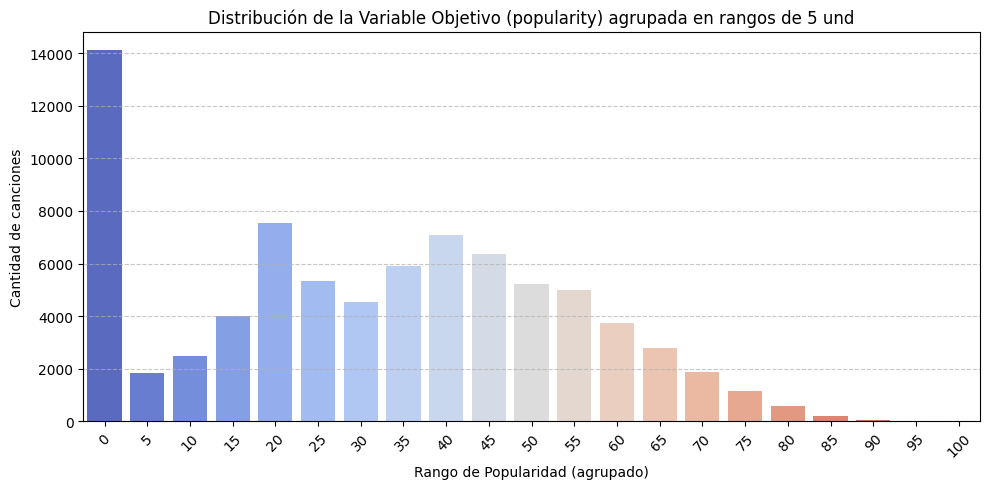

In [6]:
# Explorar estructura
estructura_datos(dataTraining)

# Analizar variable objetivo
analizar_variable_objetivo(dataTraining)

### Revisión de Valores Nulos

In [7]:
def revisar_nulos(df):
    nulos = df.isnull().sum()
    nulos = nulos[nulos > 0].sort_values(ascending=False)
    print("Variables con valores nulos:")
    display(nulos)

In [8]:
# Ejecutar revisión de valores nulos
revisar_nulos(dataTraining)

Variables con valores nulos:


,0


### Revisión de Valores Atípicos

In [9]:
def detectar_atipicos(df, columnas):
    for col in columnas:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = ((df[col] < lower) | (df[col] > upper)).sum()
        print(f"Variable '{col}': {outliers} valores atípicos")


In [10]:
# Lista de columnas numéricas seleccionadas
columnas_numericas = [
    'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
    'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature'
]

# Ejecutar revisión de valores atípicos
detectar_atipicos(dataTraining, columnas_numericas)


Variable 'duration_ms': 3990 valores atípicos
Variable 'danceability': 420 valores atípicos
Variable 'energy': 0 valores atípicos
Variable 'key': 0 valores atípicos
Variable 'loudness': 4351 valores atípicos
Variable 'mode': 0 valores atípicos
Variable 'speechiness': 9277 valores atípicos
Variable 'acousticness': 0 valores atípicos
Variable 'instrumentalness': 17645 valores atípicos
Variable 'liveness': 6032 valores atípicos
Variable 'valence': 0 valores atípicos
Variable 'tempo': 424 valores atípicos
Variable 'time_signature': 8598 valores atípicos


## **Preprocesamiento de datos**

## **Selección de variables**

### Análisis de Correlación Variables Predictoras Numéricas Vs Variable Objetivo

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

def analizar_correlacion(df, target='popularity', top_n=10):
    """
    Muestra las correlaciones entre la variable objetivo y las variables numéricas del dataset.
    También grafica las correlaciones más fuertes.
    """
    # Selección de solo columnas numéricas
    df_numericas = df.select_dtypes(include=['number'])

    # Cálculo de matriz de correlación
    matriz_corr = df_numericas.corr()

    # Extraer correlaciones con la variable objetivo
    correlaciones_target = matriz_corr[target].drop(target).sort_values(key=abs, ascending=False)

    # Mostrar top_n correlaciones
    print(f"\nTop {top_n} variables más correlacionadas con '{target}':\n")
    display(correlaciones_target.head(top_n))

    # Gráfico de correlaciones más relevantes
    plt.figure(figsize=(10, 6))
    sns.barplot(x=correlaciones_target.head(top_n),
                y=correlaciones_target.head(top_n).index,
                palette="coolwarm")
    plt.title(f"Top {top_n} Variables Numéricas más Correlacionadas con '{target}'")
    plt.xlabel("Correlación")
    plt.ylabel("Variables")
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    return correlaciones_target



Top 12 variables más correlacionadas con 'popularity':



,popularity
instrumentalness,-0.095845
loudness,0.051884
speechiness,-0.045089
valence,-0.041287
danceability,0.034825
time_signature,0.033124
acousticness,-0.027883
mode,-0.015283
tempo,0.013556
duration_ms,-0.008599


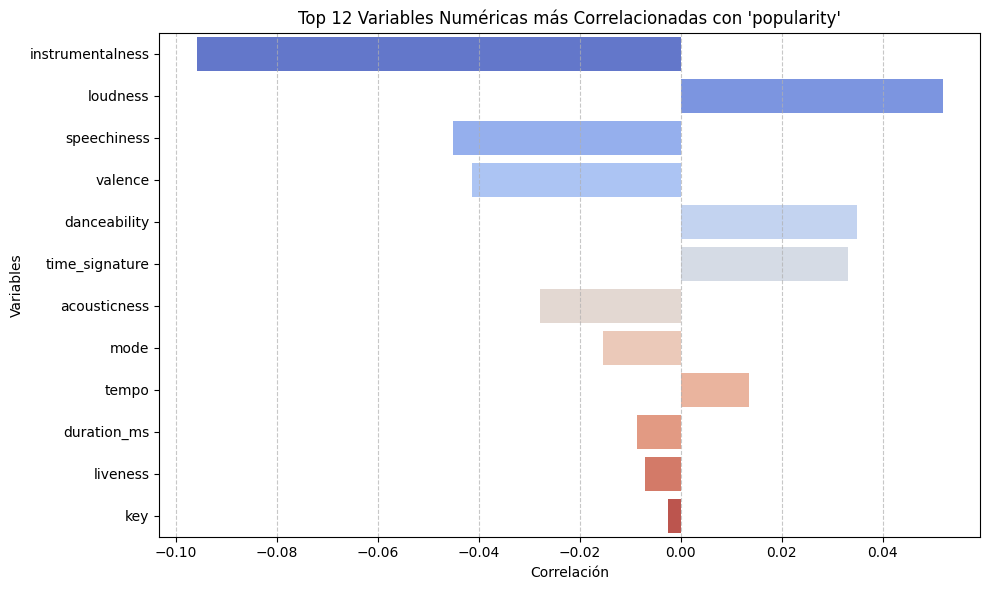

In [12]:
correlaciones = analizar_correlacion(dataTraining, target='popularity', top_n=12)


### Análisis de Variables Categóricas Vs Variable Objetivo

In [13]:
def analizar_categoricas_vs_popularidad(df, categoricas, target='popularity', top_n=20):
    """
    Analiza la relación entre variables categóricas y la variable objetivo.

    Parameters:
    - df: DataFrame de entrada.
    - categoricas: Lista de columnas categóricas a analizar.
    - target: Variable objetivo (por defecto 'popularity').
    - top_n: Número máximo de categorías a mostrar por variable (para evitar saturación visual).
    """

    for cat in categoricas:
        print(f"\n Análisis de la variable categórica: {cat.upper()}")

        # Conteo de frecuencias
        conteo = df[cat].value_counts().head(top_n)
        print(f"\n Frecuencia de las {top_n} categorías más comunes en '{cat}':")
        display(conteo)

        # Promedio de popularidad por categoría
        media_pop = df.groupby(cat)[target].mean().sort_values(ascending=False).head(top_n)
        print(f"\n Popularidad promedio por categoría en '{cat}':")
        display(media_pop)

        # Visualizar conteo de categorías
        plt.figure(figsize=(10, 4))
        sns.countplot(data=df[df[cat].isin(conteo.index)], y=cat, order=conteo.index, palette="crest")
        plt.title(f"Frecuencia de categorías en {cat} (Top {top_n})")
        plt.xlabel("Cantidad de canciones")
        plt.ylabel(cat)
        plt.tight_layout()
        plt.show()

        # Visualizar popularidad promedio
        plt.figure(figsize=(10, 4))
        sns.barplot(x=media_pop.values, y=media_pop.index, palette="viridis")
        plt.title(f"Popularidad promedio por categoría en {cat} (Top {top_n})")
        plt.xlabel("Popularidad Promedio")
        plt.ylabel(cat)
        plt.tight_layout()
        plt.show()



 Análisis de la variable categórica: EXPLICIT

 Frecuencia de las 20 categorías más comunes en 'explicit':


,count
explicit,
False,72962
True,6838



 Popularidad promedio por categoría en 'explicit':


,popularity
explicit,
True,36.435800
False,32.968162


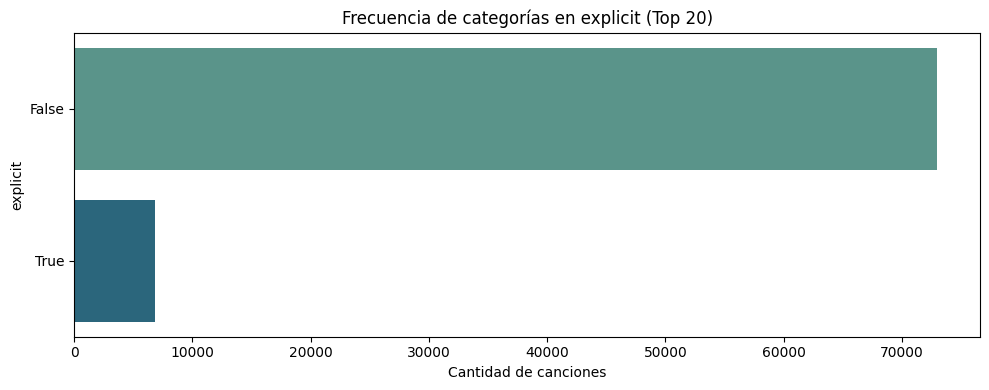

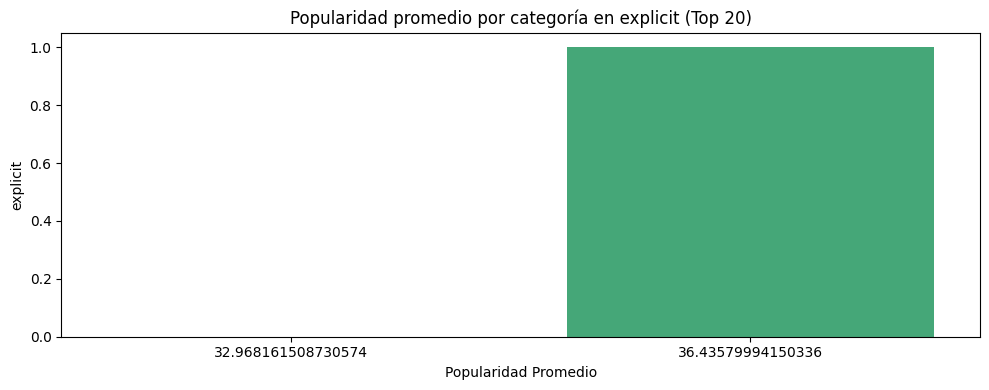


 Análisis de la variable categórica: TRACK_GENRE

 Frecuencia de las 20 categorías más comunes en 'track_genre':


,count
track_genre,
progressive-house,738
sad,737
world-music,729
singer-songwriter,727
swedish,726
ambient,725
anime,723
soul,722
trance,721



 Popularidad promedio por categoría en 'track_genre':


,popularity
track_genre,
pop-film,59.279649
k-pop,57.073487
chill,54.165498
sad,52.351425
grunge,49.985486
indian,49.624646
anime,48.926694
pop,48.615932
emo,48.513006


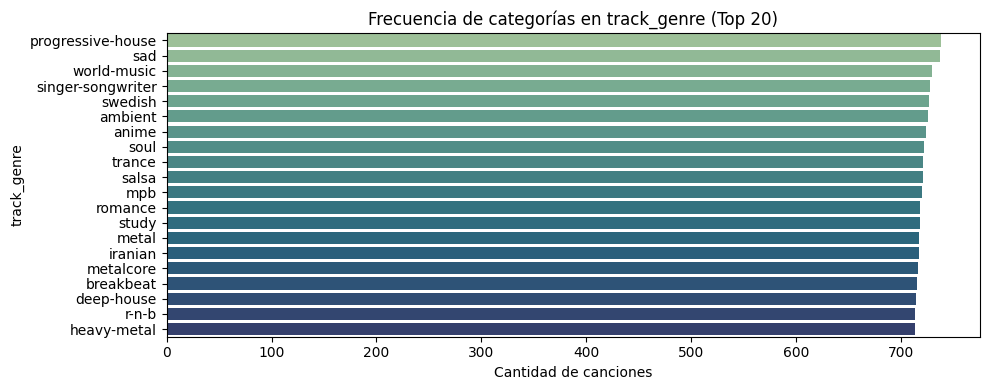

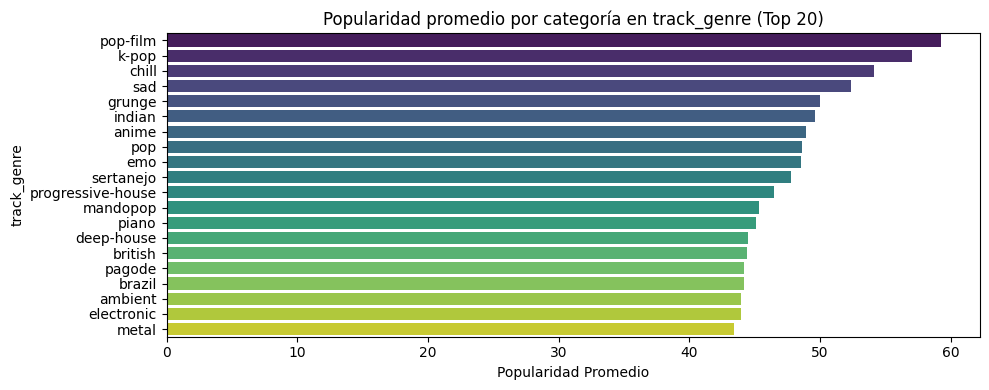


 Análisis de la variable categórica: MODE

 Frecuencia de las 20 categorías más comunes en 'mode':


,count
mode,
1,50891
0,28909



 Popularidad promedio por categoría en 'mode':


,popularity
mode,
0,33.718115
1,33.008076


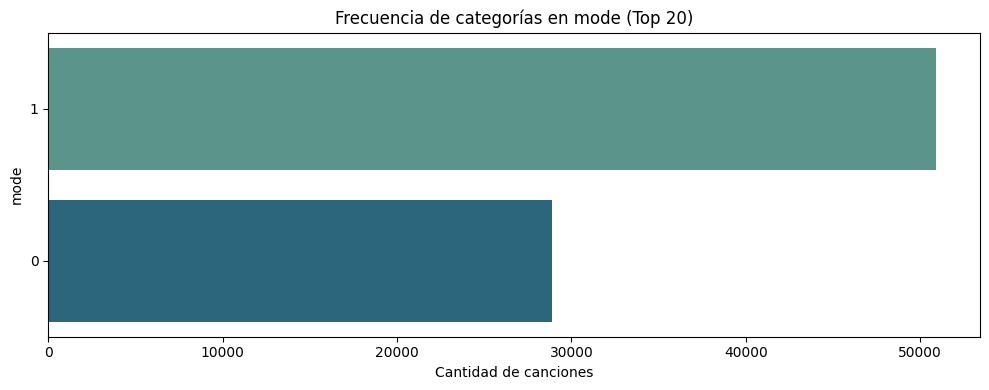

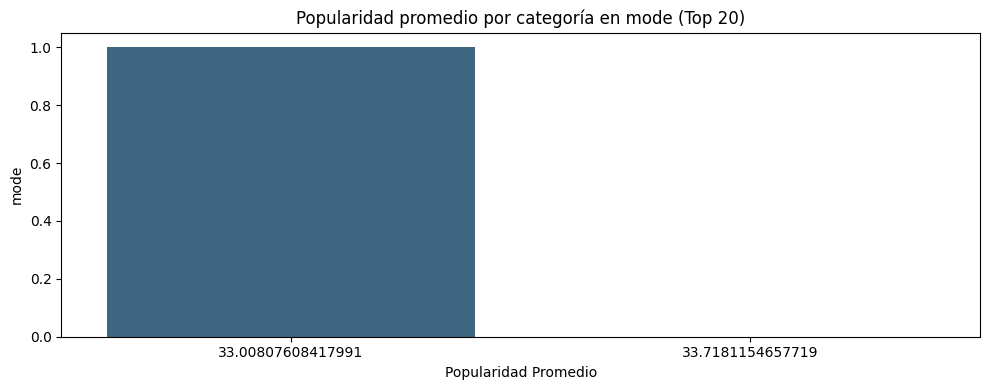


 Análisis de la variable categórica: TIME_SIGNATURE

 Frecuencia de las 20 categorías más comunes en 'time_signature':


,count
time_signature,
4,71202
3,6512
5,1274
1,710
0,102



 Popularidad promedio por categoría en 'time_signature':


,popularity
time_signature,
0,37.294118
4,33.712620
3,29.578471
1,29.208451
5,29.048666


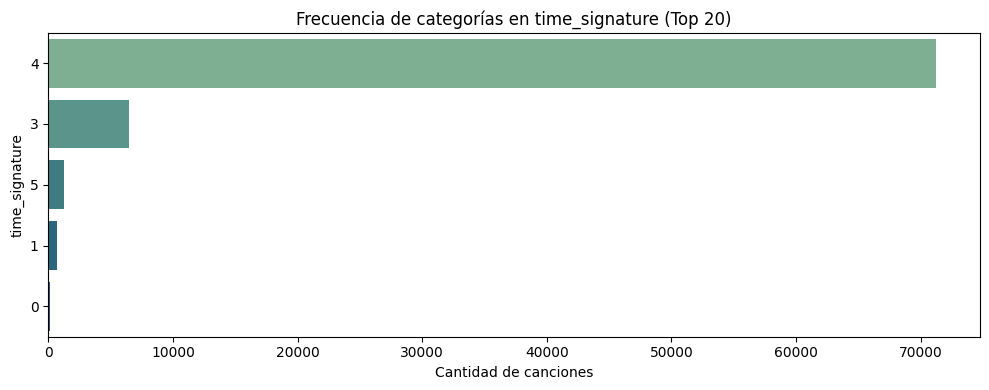

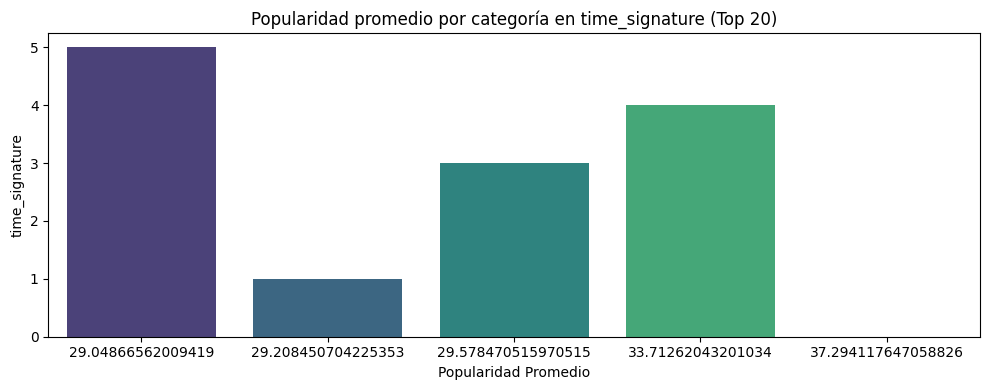


 Análisis de la variable categórica: KEY

 Frecuencia de las 20 categorías más comunes en 'key':


,count
key,
7,9261
0,9183
2,8120
9,7893
1,7531
5,6549
11,6529
4,6340
6,5560



 Popularidad promedio por categoría en 'key':


,popularity
key,
4,34.691325
2,34.328941
11,34.107980
6,33.776079
1,33.158014
3,33.046197
8,32.948330
5,32.886089
9,32.809198


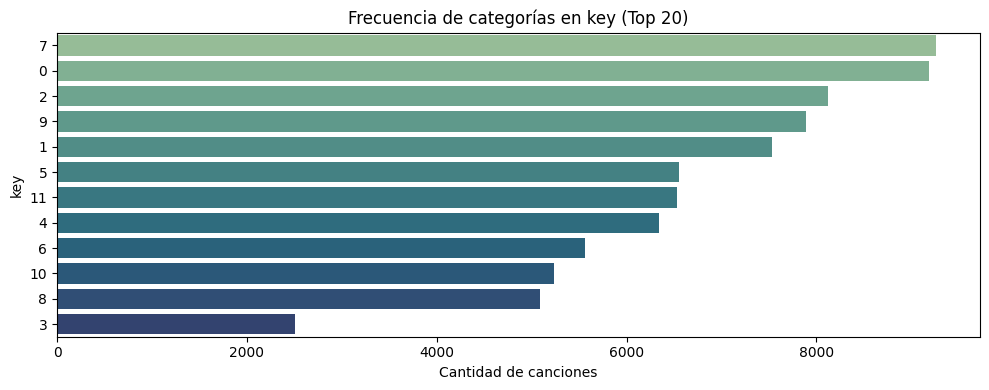

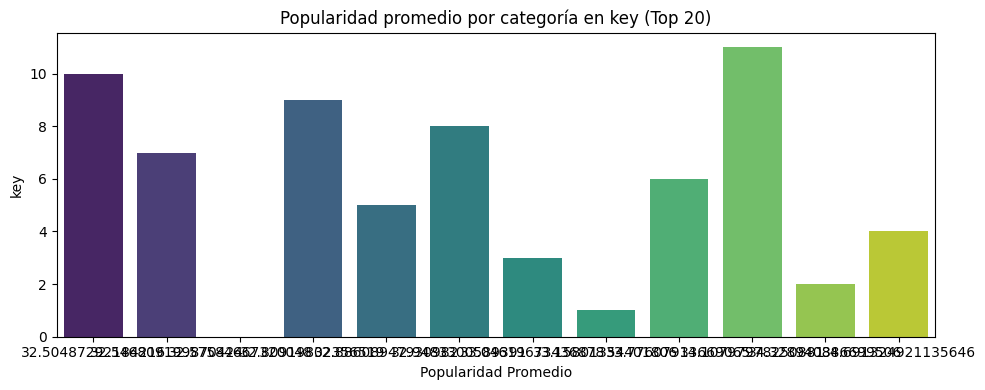

In [14]:
# Lista de variables categóricas en tu dataset
variables_categoricas = ['explicit', 'track_genre', 'mode', 'time_signature', 'key']

analizar_categoricas_vs_popularidad(dataTraining, categoricas=variables_categoricas, top_n=20)


### Análisis de Multicolinealidad Variables Numéricas Predictoras

In [15]:
def analizar_multicolinealidad(df, threshold=0.8):
    """
    Analiza la multicolinealidad entre variables numéricas.
    Muestra la matriz de correlación y reporta pares altamente correlacionados.
    """
    # Filtrar solo columnas numéricas
    df_numericas = df.select_dtypes(include='number').drop(columns=['popularity'], errors='ignore')

    # Calcular la matriz de correlación
    corr_matrix = df_numericas.corr()

    # Gráfico de calor
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True,
                cbar_kws={"shrink": .75}, mask=np.triu(np.ones(corr_matrix.shape)))
    plt.title("Matriz de Correlación entre Variables Predictoras")
    plt.show()

    # Reportar pares altamente correlacionados
    print(f"\nPares de variables con |correlación| > {threshold}:\n")
    correlated_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            corr = corr_matrix.iloc[i, j]
            if abs(corr) > threshold:
                var1 = corr_matrix.columns[i]
                var2 = corr_matrix.columns[j]
                correlated_pairs.append((var1, var2, corr))
                print(f"{var1} vs {var2} --> Correlación = {corr:.2f}")

    if not correlated_pairs:
        print("No se encontraron pares de variables altamente correlacionadas.")

    return correlated_pairs


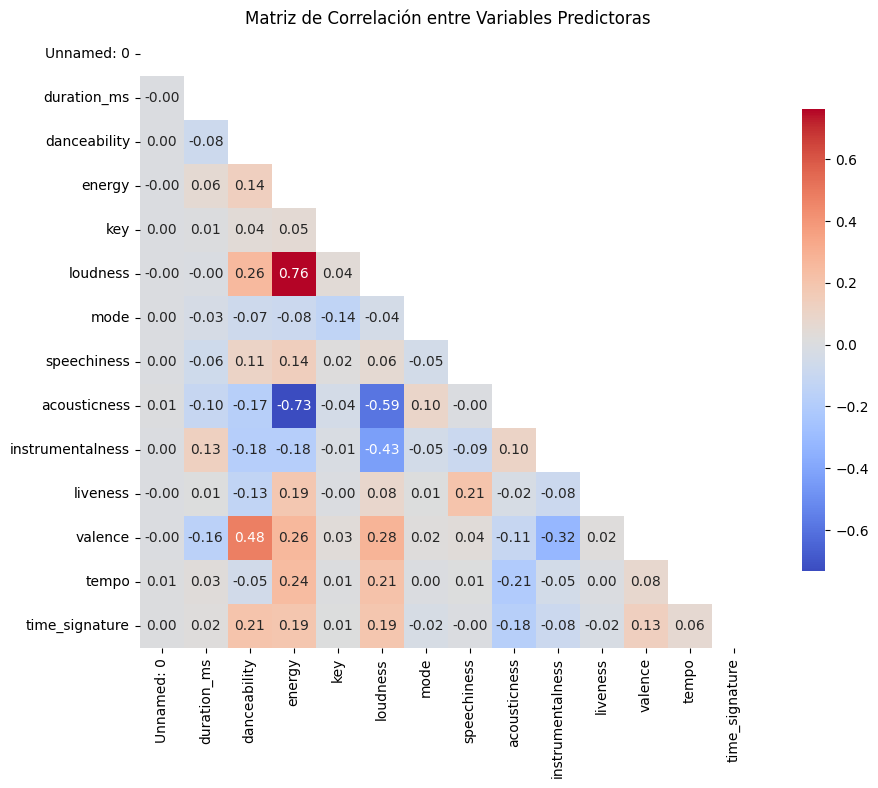


Pares de variables con |correlación| > 0.8:

No se encontraron pares de variables altamente correlacionadas.


In [16]:
pares_correlacionados = analizar_multicolinealidad(dataTraining)

In [17]:
correlation = dataTraining[columnas_numericas + ['popularity']].corr()
correlation_with_popularity = correlation['popularity'].abs().sort_values(ascending=False)
print(correlation_with_popularity)

popularity          1.000000
instrumentalness    0.095845
loudness            0.051884
speechiness         0.045089
valence             0.041287
danceability        0.034825
time_signature      0.033124
acousticness        0.027883
mode                0.015283
tempo               0.013556
duration_ms         0.008599
liveness            0.007030
key                 0.002451
energy              0.001185
Name: popularity, dtype: float64


### **Eliminación de columnas y codificación de variables categoricas**

In [18]:
from sklearn.preprocessing import LabelEncoder
#Eliminar columnas que no aportan al modelo
columnas_a_eliminar = ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name']
dataTrainingfinal = dataTraining.drop(columns=columnas_a_eliminar)
dataTrainingfinal.head()

# Convertir "explicit" a 0 y 1
dataTrainingfinal['explicit'] = dataTrainingfinal['explicit'].astype(int)

# Codificar otras variables categóricas
variables_categoricas = ['track_genre', 'mode', 'time_signature', 'key']
for col in variables_categoricas:
    dataTrainingfinal[col] = LabelEncoder().fit_transform(dataTrainingfinal[col].astype(str))

In [19]:
dataTrainingfinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_ms       79800 non-null  int64  
 1   explicit          79800 non-null  int64  
 2   danceability      79800 non-null  float64
 3   energy            79800 non-null  float64
 4   key               79800 non-null  int64  
 5   loudness          79800 non-null  float64
 6   mode              79800 non-null  int64  
 7   speechiness       79800 non-null  float64
 8   acousticness      79800 non-null  float64
 9   instrumentalness  79800 non-null  float64
 10  liveness          79800 non-null  float64
 11  valence           79800 non-null  float64
 12  tempo             79800 non-null  float64
 13  time_signature    79800 non-null  int64  
 14  track_genre       79800 non-null  int64  
 15  popularity        79800 non-null  int64  
dtypes: float64(9), int64(7)
memory usage: 9.

### **Evaluar importancia de variables**

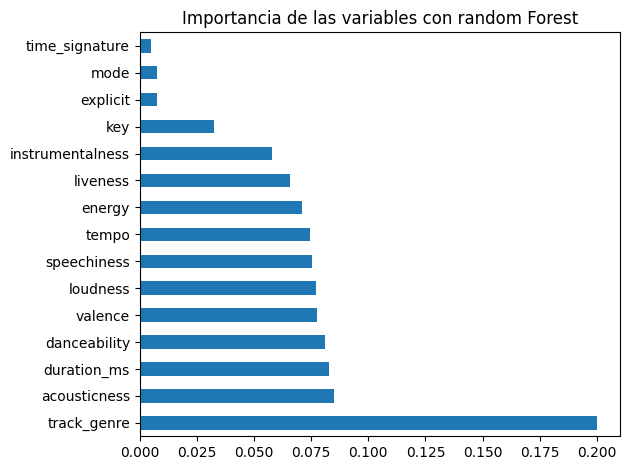

In [20]:
# Variables X y Y
X = dataTrainingfinal.drop(columns='popularity')
y = dataTrainingfinal['popularity']
# Se usa Random Forest para ver importancia de variables
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Mostrar la importancia de las variables
importancia = pd.Series(rf.feature_importances_, index=X.columns)
importancia.sort_values(ascending=False).plot(kind='barh')
plt.title("Importancia de las variables con random Forest")
plt.tight_layout()
plt.show()



In [21]:
def eliminar_variables_por_importancia(X, y, modelo, umbral=0.015, target='popularity', verbose=True):
    """
    """

    importancias = pd.Series(modelo.feature_importances_, index=X.columns)
    variables_conservadas = importancias[importancias >= umbral].index.tolist()
    variables_eliminadas = importancias[importancias < umbral].index.tolist()

    if verbose:
        print(f" Variables conservadas ({len(variables_conservadas)}): {variables_conservadas}")
        print(f" Variables eliminadas ({len(variables_eliminadas)}): {variables_eliminadas}")

    dataTraining_reducido = X[variables_conservadas].copy()
    dataTraining_reducido[target] = y

    return dataTraining_reducido, variables_conservadas, variables_eliminadas


In [22]:
# Variables originales
X = dataTrainingfinal.drop(columns='popularity')
y = dataTrainingfinal['popularity']

# Utilizamos el Modelo ya entrenado
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Aplicar función de eliminación de variables
dataTraining_reducido, vars_utiles, vars_desechadas = eliminar_variables_por_importancia(X, y, modelo=rf)

 Variables conservadas (12): ['duration_ms', 'danceability', 'energy', 'key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'track_genre']
 Variables eliminadas (3): ['explicit', 'mode', 'time_signature']


In [23]:
dataTraining_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   duration_ms       79800 non-null  int64  
 1   danceability      79800 non-null  float64
 2   energy            79800 non-null  float64
 3   key               79800 non-null  int64  
 4   loudness          79800 non-null  float64
 5   speechiness       79800 non-null  float64
 6   acousticness      79800 non-null  float64
 7   instrumentalness  79800 non-null  float64
 8   liveness          79800 non-null  float64
 9   valence           79800 non-null  float64
 10  tempo             79800 non-null  float64
 11  track_genre       79800 non-null  int64  
 12  popularity        79800 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 7.9 MB


In [24]:
#importancias_df = pd.DataFrame({
#    'feature': X.columns,
#    'importance': rf.feature_importances_
#}).sort_values('importance', ascending=False)
#importancias_df

### **Transformaciones**

### Análisis de Variables Predictoras

 Revisión de valores nulos por columna:

 No hay valores nulos en el dataset.

 Revisión visual de valores atípicos (outliers) con boxplot:


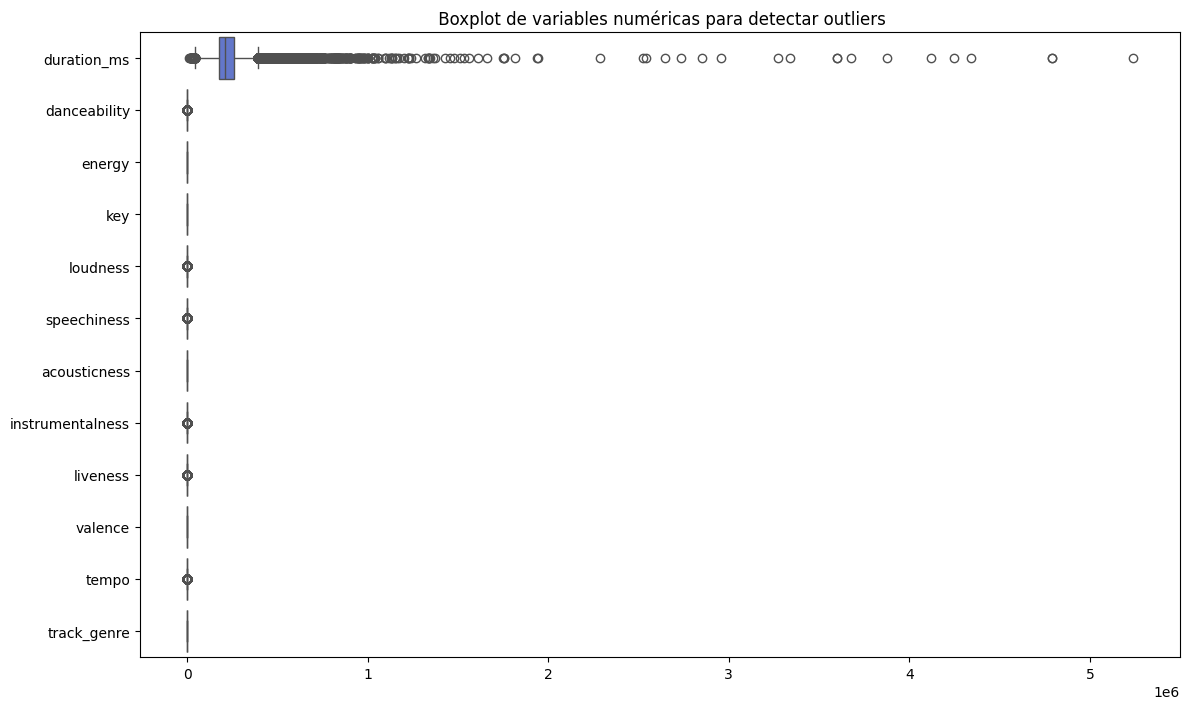


 duration_ms: 3990 valores atípicos detectados.


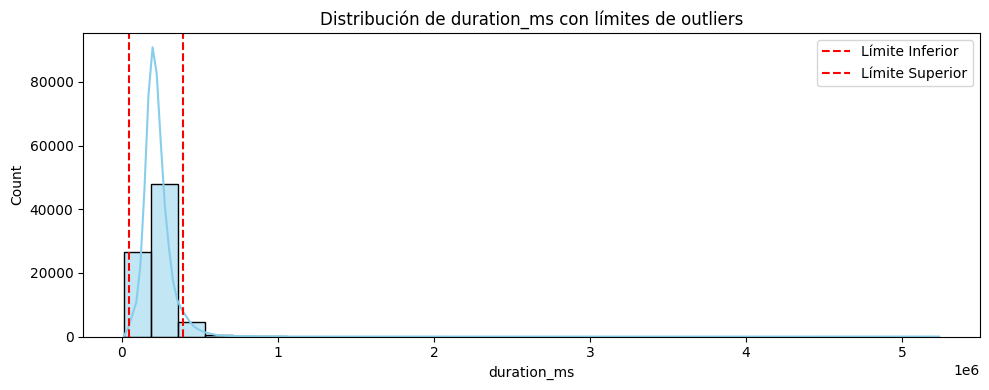


 danceability: 420 valores atípicos detectados.


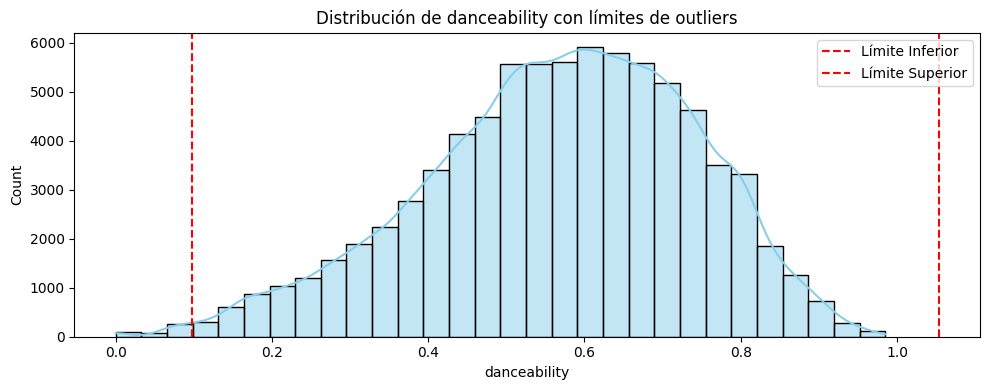


 loudness: 4351 valores atípicos detectados.


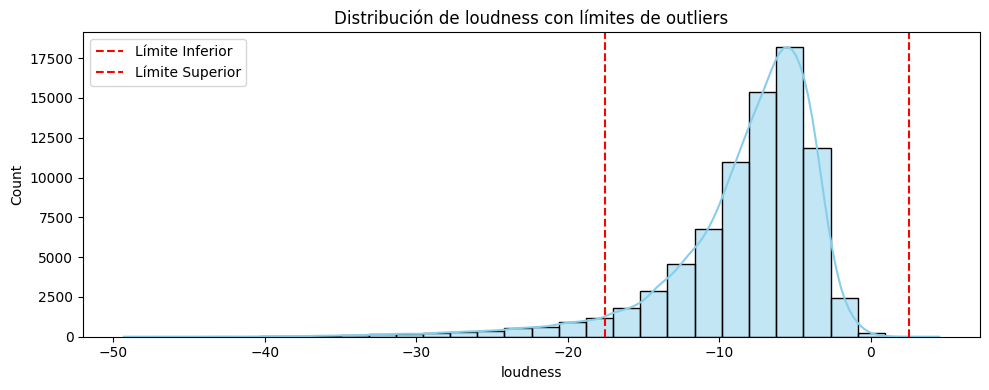


 speechiness: 9277 valores atípicos detectados.


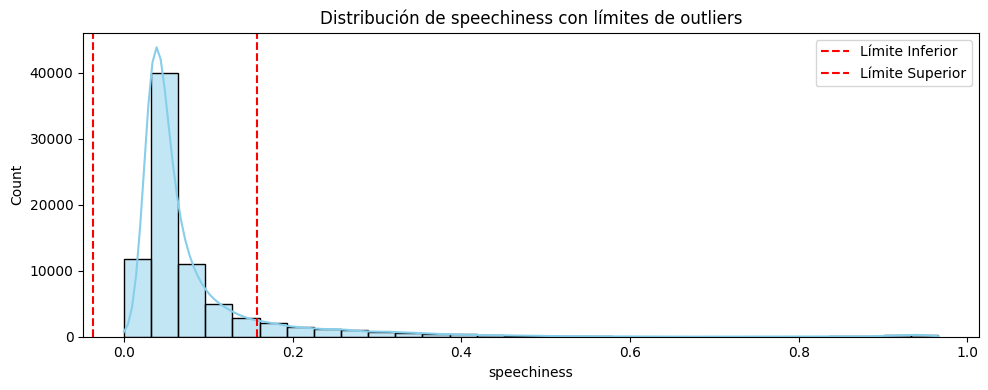


 instrumentalness: 17645 valores atípicos detectados.


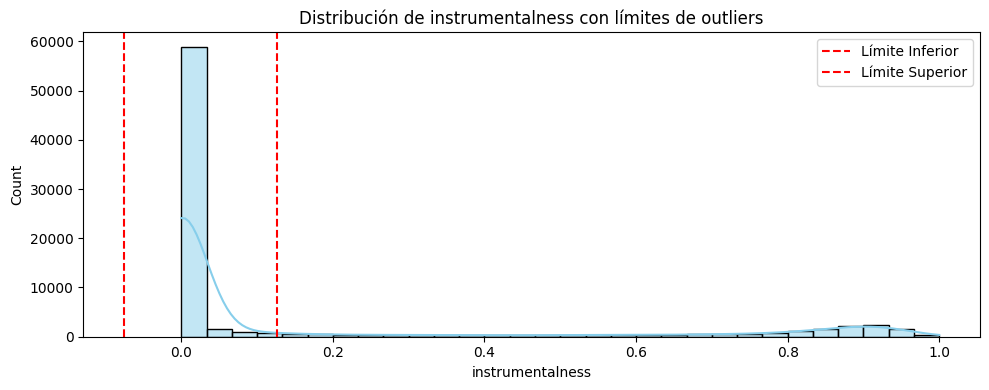


 liveness: 6032 valores atípicos detectados.


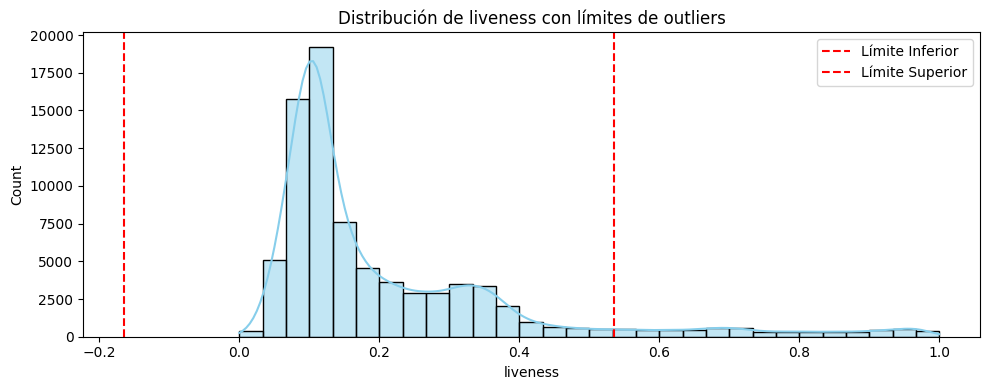


 tempo: 424 valores atípicos detectados.


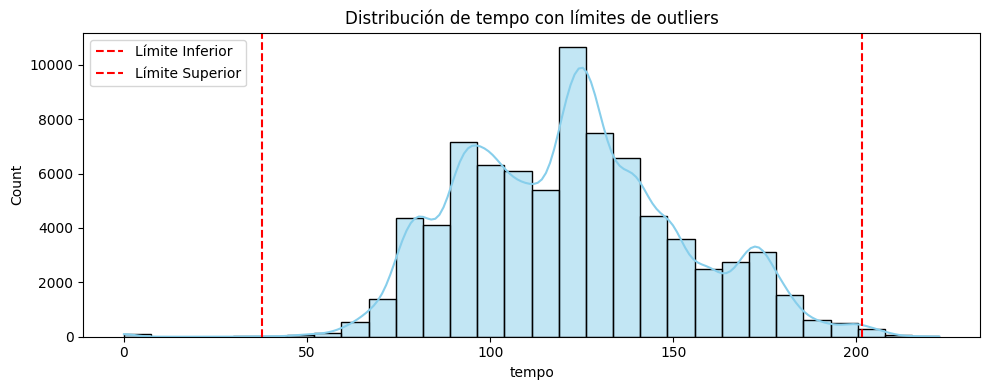

In [25]:
def detectar_nulos_y_atipicos(df):
    """
    """

    print(" Revisión de valores nulos por columna:\n")
    nulos = df.isnull().sum()
    nulos = nulos[nulos > 0]

    if not nulos.empty:
        display(nulos)
        print("\n Se encontraron columnas con valores nulos. Visualizando...")

        plt.figure(figsize=(10, 6))
        sns.heatmap(df.isnull(), cmap="YlOrBr", cbar=False)
        plt.title(" Heatmap de valores nulos")
        plt.show()
    else:
        print(" No hay valores nulos en el dataset.")

    print("\n Revisión visual de valores atípicos (outliers) con boxplot:")
    columnas_numericas = df.select_dtypes(include=['float64', 'int64']).drop(columns=['popularity']).columns

    plt.figure(figsize=(12, len(columnas_numericas) * 0.6))
    sns.boxplot(data=df[columnas_numericas], orient='h', palette="coolwarm")
    plt.title(" Boxplot de variables numéricas para detectar outliers")
    plt.tight_layout()
    plt.show()

    # Revisión de outliers por variable
    for col in columnas_numericas:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lim_inf = Q1 - 1.5 * IQR
        lim_sup = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lim_inf) | (df[col] > lim_sup)][col]

        if not outliers.empty:
            print(f"\n {col}: {len(outliers)} valores atípicos detectados.")

            plt.figure(figsize=(10, 4))
            sns.histplot(df[col], bins=30, kde=True, color="skyblue")
            plt.axvline(lim_inf, color="red", linestyle="--", label="Límite Inferior")
            plt.axvline(lim_sup, color="red", linestyle="--", label="Límite Superior")
            plt.title(f"Distribución de {col} con límites de outliers")
            plt.legend()
            plt.tight_layout()
            plt.show()

# Ejecutar sobre el dataframe de variables seleccionadas
detectar_nulos_y_atipicos(dataTraining_reducido)

#### **Transformación Logaritmica**

#### **Escalado**

#### **Normalización si es necesario**

## **Entrenamiento de los modelos**

### **Entrenamiento en Train y Validation**

### **Entrenamiento en Test**

## **Guardar Archivo Entrenado**

### **Archivo para Kaggle**

In [ ]:
# Predicción del conjunto de test - acá se genera un número aleatorio como ejemplo
np.random.seed(42)
y_pred = pd.DataFrame(np.random.rand(dataTesting.shape[0]) * 100, index=dataTesting.index, columns=['Popularity'])

In [ ]:
# Guardar predicciones en formato exigido en la competencia de kaggle
y_pred.to_csv('test_submission_file.csv', index_label='ID')
y_pred.head()

,Popularity
0,37.454012
1,95.071431
2,73.199394
3,59.865848
4,15.601864


### **Archivo para API**